In [37]:
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
import seaborn as sns
from scipy import *

city_data = "./raw_data/city_data.csv"
ride_data = "./raw_data/ride_data.csv"

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [38]:
driver_count = city_df.groupby(["city", "type"])["driver_count"].sum()

city_grouped = pd.DataFrame({"Driver Count" : driver_count}).reset_index()

city_grouped.head()


,city,type,Driver Count
0,Alvarezhaven,Urban,21
1,Alyssaberg,Urban,67
2,Anitamouth,Suburban,16
3,Antoniomouth,Urban,21
4,Aprilchester,Urban,49


In [39]:
ride_df = pd.read_csv(ride_data)
total_rides = ride_df.groupby("city")["ride_id"].count()
avg_fare = ride_df.groupby("city")["fare"].mean()

ride_grouped = pd.DataFrame({"Total Rides" : total_rides
                            ,"Avg Fare" : avg_fare
                            }).reset_index()
ride_grouped.head(5)

,city,Avg Fare,Total Rides
0,Alvarezhaven,23.928710,31
1,Alyssaberg,20.609615,26
2,Anitamouth,37.315556,9
3,Antoniomouth,23.625000,22
4,Aprilchester,21.981579,19


In [40]:
combine_df = pd.merge(city_grouped, ride_grouped, on="city")
combine_df.head()

,city,type,Driver Count,Avg Fare,Total Rides
0,Alvarezhaven,Urban,21,23.928710,31
1,Alyssaberg,Urban,67,20.609615,26
2,Anitamouth,Suburban,16,37.315556,9
3,Antoniomouth,Urban,21,23.625000,22
4,Aprilchester,Urban,49,21.981579,19


TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

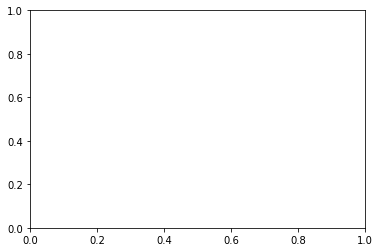

In [43]:
combine_df.plot(kind="scatter", x="Total Rides", y= "Avg Fare", s=["Driver Count"])